In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
atl = np.genfromtxt("ATL_MonMeanTemp_1879_2020.csv", delimiter=",", skip_header=1)
sea = np.genfromtxt("SEA_MonMeanTemp_1894_2020.csv", delimiter=",", skip_header=1)

In [3]:
mon = np.array(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

Text(0.5, 1.0, 'September Temperatures in Atlanta')

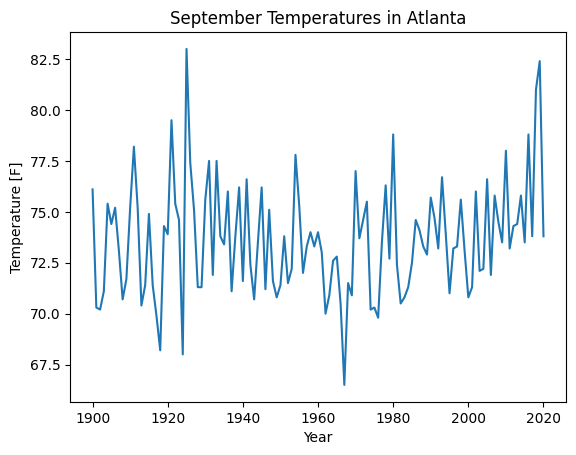

In [4]:
plt.plot(atl[:, 0][atl[:, 0] > 1899], atl[:, 9][atl[:, 0] > 1899])
plt.xlabel("Year")
plt.ylabel("Temperature [F]")
plt.title("September Temperatures in Atlanta")

Text(0.5, 1.0, 'September Temperatures in Seattle')

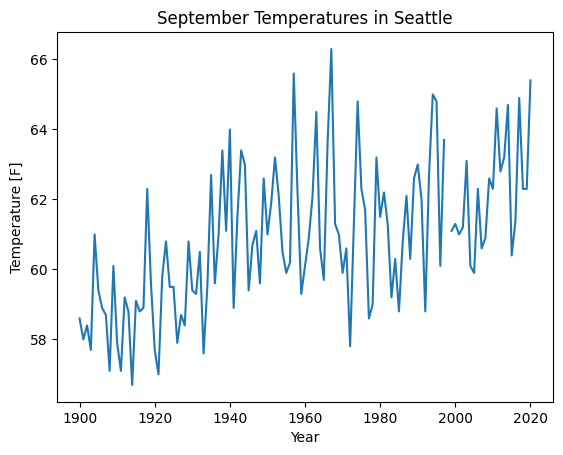

In [5]:
sea[:, 9][(sea[:, 0] > 1899) & (sea[:, 9] == -999.0)] = np.nan

plt.plot(sea[:, 0][sea[:, 0] > 1899], sea[:, 9][sea[:, 0] > 1899])
plt.xlabel("Year")
plt.ylabel("Temperature [F]")
plt.title("September Temperatures in Seattle")

Text(0.5, 1.0, 'Pcolor plot for Atlanta')

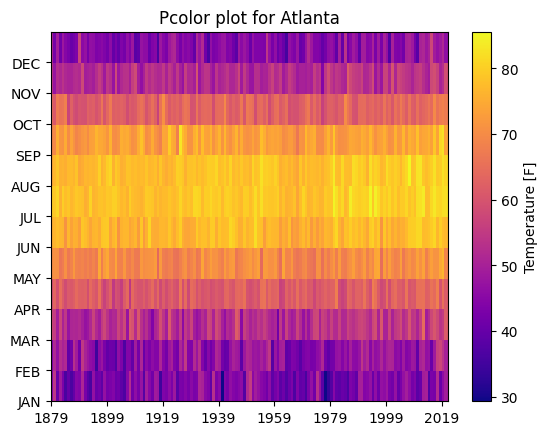

In [6]:

plt.pcolor(atl[:, 1:].T, cmap = "plasma")
plt.colorbar(label="Temperature [F]")
plt.xticks(ticks = np.arange(0, 160, 20), labels= np.int16(atl[:, 0][np.arange(0, 160, 20)]))
plt.yticks(ticks = np.arange(0, 12, 1), labels= mon)
plt.title("Pcolor plot for Atlanta")

Text(0.5, 1.0, 'Pcolor plot for Seattle')

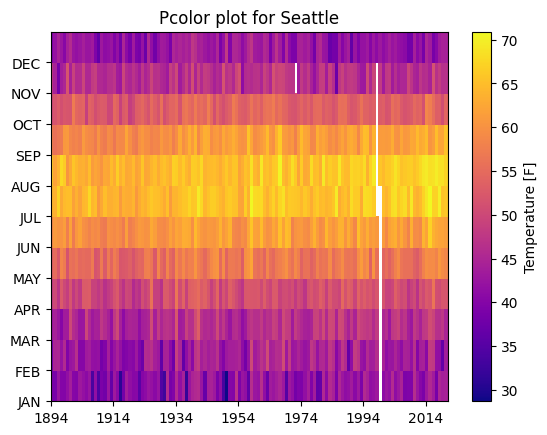

In [7]:
sea[sea == -999.0] = np.nan

plt.pcolor(sea[:, 1:].T, cmap = "plasma")
plt.colorbar(label="Temperature [F]")
plt.xticks(ticks = np.arange(0, 140, 20), labels= np.int16(sea[:, 0][np.arange(0, 140, 20)]))
plt.yticks(ticks = np.arange(0, 12, 1), labels= mon)
plt.title("Pcolor plot for Seattle")

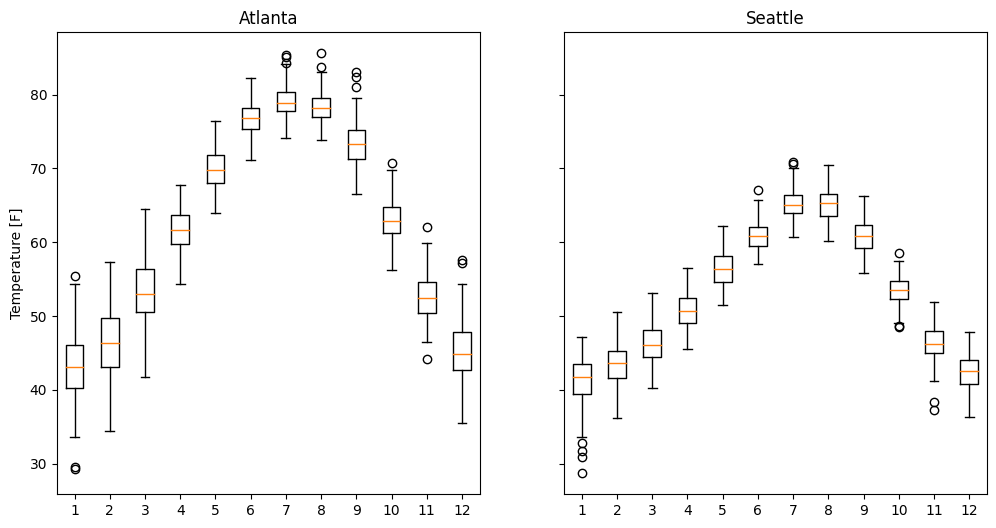

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
ax[0].boxplot(atl[:, 1:])#, tick_labels=mon)
ax[0].set_title('Atlanta')

ax[1].boxplot([sea[:, 1:][:, i][~np.isnan(sea[:, 1:][:, i])] for i in range(sea[:, 1:].shape[1])])#, tick_labels=mon)
ax[1].set_title('Seattle')

ax[0].set_ylabel('Temperature [F]')
plt.show()

Text(0, 0.5, 'Probability density')

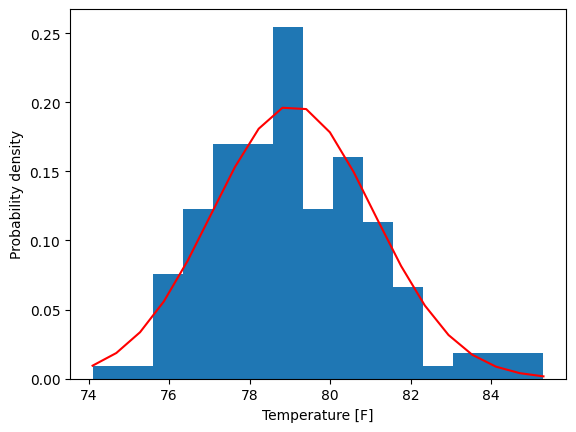

In [9]:
mu = np.mean(atl[:, 7])
sigma = np.std(atl[:, 7])

x = np.linspace(np.min(atl[:, 7]), np.max(atl[:, 7]), 20)
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

plt.hist(atl[:, 7], bins = 15, density = True)
plt.plot(x, gaussian, "r-")
plt.xlabel('Temperature [F]')
plt.ylabel('Probability density')

<function matplotlib.pyplot.show(close=None, block=None)>

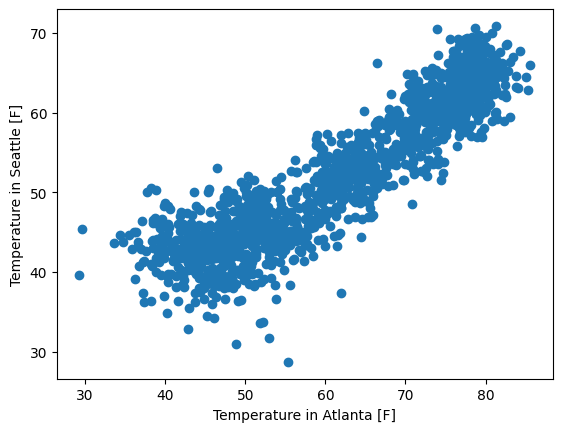

In [10]:
plt.scatter(atl[15:, 1:], sea[:, 1:])
plt.xlabel('Temperature in Atlanta [F]')
plt.ylabel('Temperature in Seattle [F]')
plt.show